### PROYECTO DE CURSO – FASE 1
#### Ingeniería de características
##### Monica Velasquez y Enrique Rodriguez

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Selección de Variables

In [2]:
data = pd.read_csv("bank-additional-full.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Variables faltantes por columnas
data.isnull().mean()

age               0.051131
job               0.008012
marital           0.001942
education         0.042027
default           0.208726
housing           0.024036
loan              0.024036
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.053486
campaign          0.000000
pdays             0.023721
previous          0.019739
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

#### Variables categóricas, continuas y discretas

In [4]:
categoricas = [col for col in data.columns if(data[col].dtypes == 'object')]
categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [5]:
continuas = [col for col in data.columns if((data[col].dtypes in ['int64', 'float64']) and len(data[col].unique()) > 30)]
continuas

['age', 'duration', 'campaign', 'euribor3m']

In [6]:
discretas = [col for col in data.columns if((data[col].dtypes in ['int64', 'float64']) and len(data[col].unique()) <= 30)]
discretas

['pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed']

#### Imputación de variables numéricas continuas:

In [7]:
continuas_con_na = [col for col in continuas if data[col].isnull().mean() > 0]
data[continuas_con_na].isnull().mean() 

age         0.051131
duration    0.053486
dtype: float64

##### Análisis para Variable age

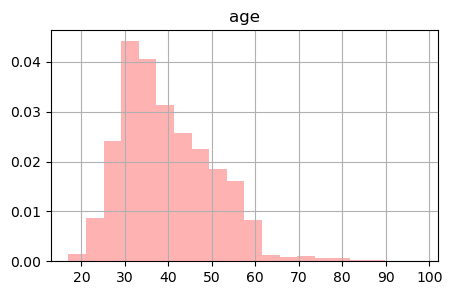

In [8]:
fig = plt.figure(figsize=(5, 3))
data['age'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('age')
plt.show()

##### Imputación por Media

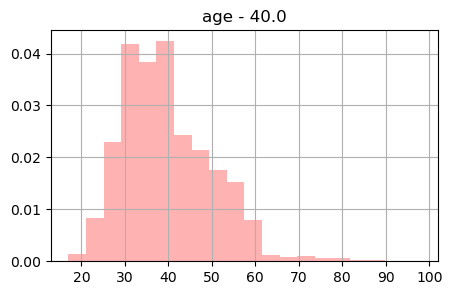

In [9]:
mean_age = round(data['age'].mean(), 2)

temp_series = data['age'].fillna(mean_age)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('age - ' + str(mean_age))
plt.show()

In [10]:
#Imputación
data['age'].fillna(mean_age, inplace=True)

##### Análisis para Variable duration

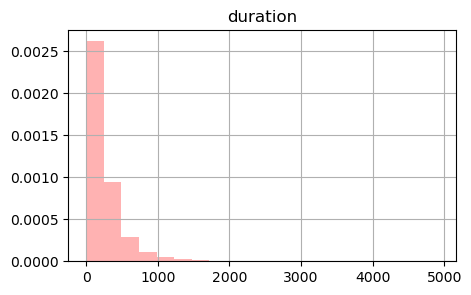

In [11]:
fig = plt.figure(figsize=(5, 3))
data['duration'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('duration')
plt.show()

##### Imputación por Media

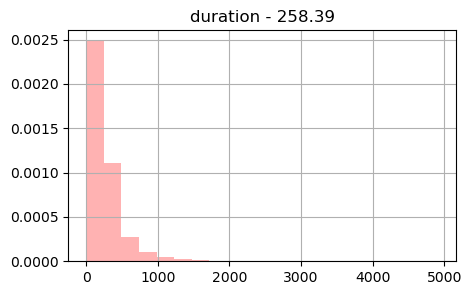

In [12]:
mean_duration = round(data['duration'].mean(), 2)

temp_series = data['duration'].fillna(mean_duration)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('duration - ' + str(mean_duration))
plt.show()

In [13]:
#Imputación
data['duration'].fillna(mean_duration, inplace=True)

#### Imputación de variables numéricas discretas

In [14]:
discretas_con_na = [col for col in discretas if data[col].isnull().mean() > 0]
data[discretas_con_na].isnull().mean() 

pdays       0.023721
previous    0.019739
dtype: float64

#### Análisis de Variable pdays

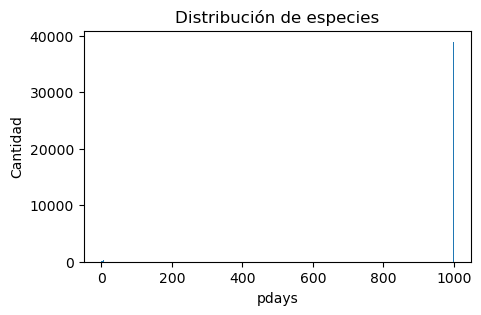

In [15]:
fig = plt.figure(figsize=(5, 3))

pdays = data["pdays"].dropna().unique()

cantidad = data["pdays"].value_counts()

plt.bar(pdays, cantidad)
plt.xlabel("pdays")
plt.ylabel("Cantidad")
plt.title("Distribución de especies")
plt.show()

In [16]:
data['pdays'].fillna(2, inplace=True)

#### Análisis de Variable previous

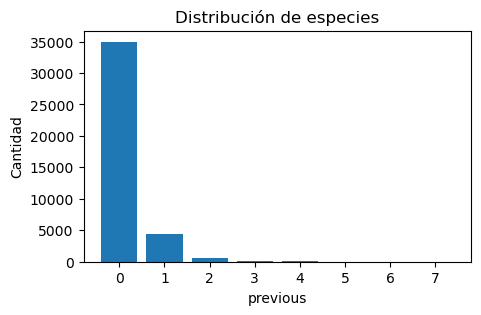

In [17]:
fig = plt.figure(figsize=(5, 3))

previous = data["previous"].dropna().unique()

cantidad = data["previous"].value_counts()

plt.bar(previous, cantidad)
plt.xlabel("previous")
plt.ylabel("Cantidad")
plt.title("Distribución de especies")
plt.show()

In [18]:
data['previous'].fillna(2, inplace=True)

#### Imputación de variables categóricas

In [19]:
categoricas_con_na = [col for col in categoricas if data[col].isnull().mean() > 0]
data[categoricas_con_na].isnull().mean() 

job          0.008012
marital      0.001942
education    0.042027
default      0.208726
housing      0.024036
loan         0.024036
dtype: float64

### Análisis de variable job

In [20]:
data['job'].value_counts().head()

job
admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924
Name: count, dtype: int64

In [21]:
data['job'].fillna('admin.', inplace=True)

### Análisis de variable marital

In [22]:
data['marital'].value_counts().head()

marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

In [23]:
data['marital'].fillna('married', inplace=True)

### Análisis de variable education

In [24]:
data['education'].value_counts().head()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
Name: count, dtype: int64

In [25]:
data['education'].fillna('university.degree', inplace=True)

### Análisis de variable default

In [26]:
data['default'].value_counts().head()

default
no     32588
yes        3
Name: count, dtype: int64

In [27]:
data['default'].fillna('no', inplace=True)

### Análisis de variable housing

In [28]:
data['housing'].value_counts().head()

housing
yes    21576
no     18622
Name: count, dtype: int64

In [29]:
data['housing'].fillna('yes', inplace=True)

### Análisis de variable loan

In [30]:
data['loan'].value_counts().head()

loan
no     33950
yes     6248
Name: count, dtype: int64

In [31]:
data['loan'].fillna('no', inplace=True)

In [32]:
pd.DataFrame(data.isnull().mean()).transpose()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Codificación de Variables Categóricas

In [33]:
categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [34]:
for col in categoricas:
       values_for_encode = data[col].value_counts().to_dict()
       data[col] = data[col].map(values_for_encode)

In [35]:
data.dtypes

age               float64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration          float64
campaign            int64
pdays             float64
previous          float64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

### Tratamiento de outliers

In [36]:
# Identificar las columnas con datos numéricos continuos
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Función para detectar y tratar outliers usando IQR
def treat_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar los outliers
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
        
    return df

# Aplicar el tratamiento de outliers a las columnas numéricas continuas
data_treated = treat_outliers(data, numerical_cols)

# resultado
data_treated[numerical_cols].describe()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.0,41188.000000,41188.0,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.0,41188.0,41188.0,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.0
mean,39.888438,6823.050500,18949.432650,8993.907546,41185.0,20782.830922,34940.0,22089.702632,8070.742304,8247.943819,...,2.275274,999.0,0.0,35563.0,0.081886,93.575664,-40.503143,3.621291,5167.035911,36548.0
std,9.829728,3573.880061,7785.158535,4017.155144,0.0,1962.962158,0.0,5344.723303,4326.293736,291.924782,...,1.550510,0.0,0.0,0.0,1.570960,0.578840,4.626606,1.734447,72.251528,0.0
min,17.000000,875.000000,4612.000000,18.000000,41185.0,18622.000000,34940.0,15044.000000,182.000000,7827.000000,...,1.000000,999.0,0.0,35563.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000,36548.0
25%,32.000000,2924.000000,11568.000000,5243.000000,41185.0,18622.000000,34940.0,15044.000000,5318.000000,8090.000000,...,1.000000,999.0,0.0,35563.0,-1.800000,93.075000,-42.700000,1.344000,5099.100000,36548.0
50%,39.000000,6743.000000,25008.000000,9515.000000,41185.0,22566.000000,34940.0,26144.000000,7174.000000,8134.000000,...,2.000000,999.0,0.0,35563.0,1.100000,93.749000,-41.800000,4.857000,5191.000000,36548.0
75%,46.000000,10752.000000,25008.000000,13899.000000,41185.0,22566.000000,34940.0,26144.000000,13769.000000,8514.000000,...,3.000000,999.0,0.0,35563.0,1.400000,93.994000,-36.400000,4.961000,5228.100000,36548.0
max,67.000000,10752.000000,25008.000000,13899.000000,41185.0,22566.000000,34940.0,26144.000000,13769.000000,8623.000000,...,6.000000,999.0,0.0,35563.0,1.400000,94.767000,-26.950000,5.045000,5228.100000,36548.0


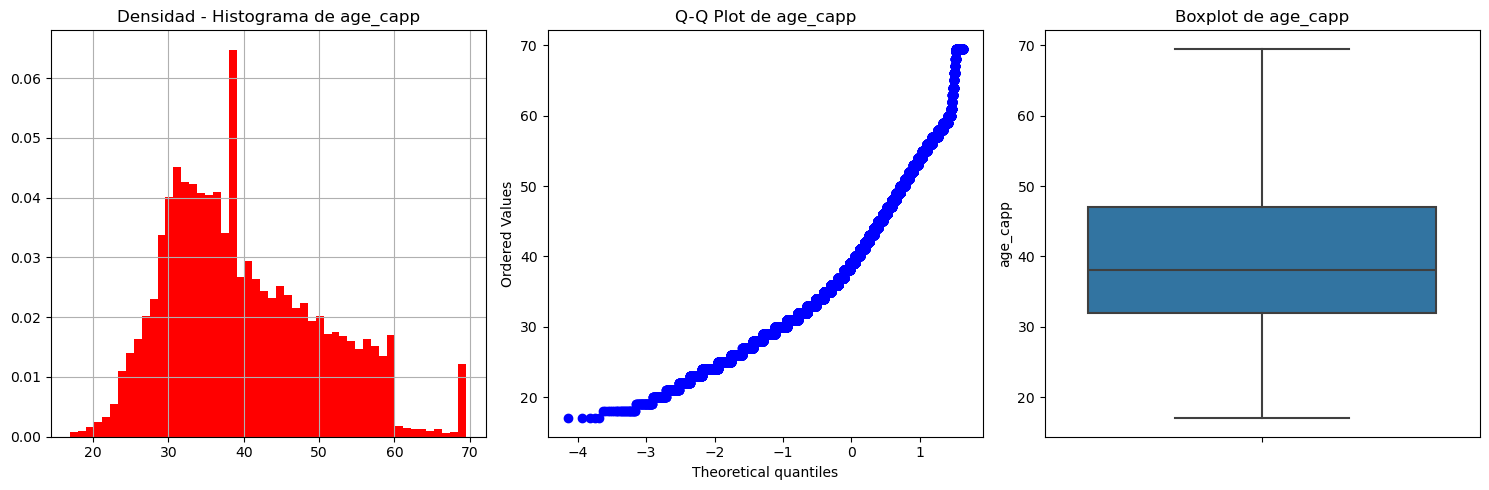

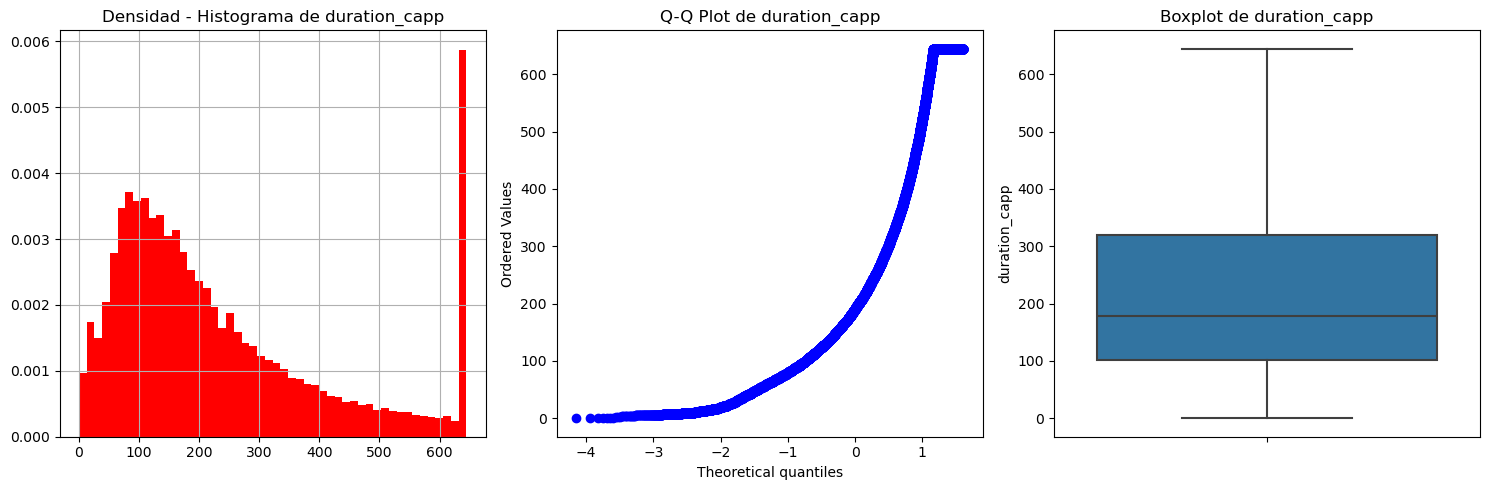

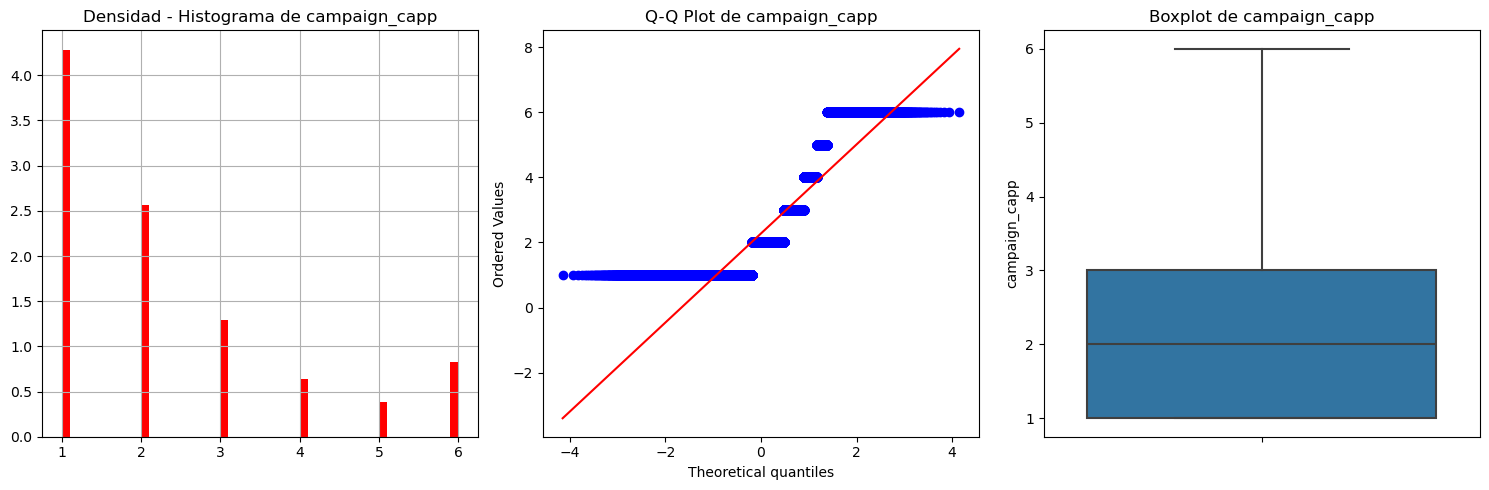

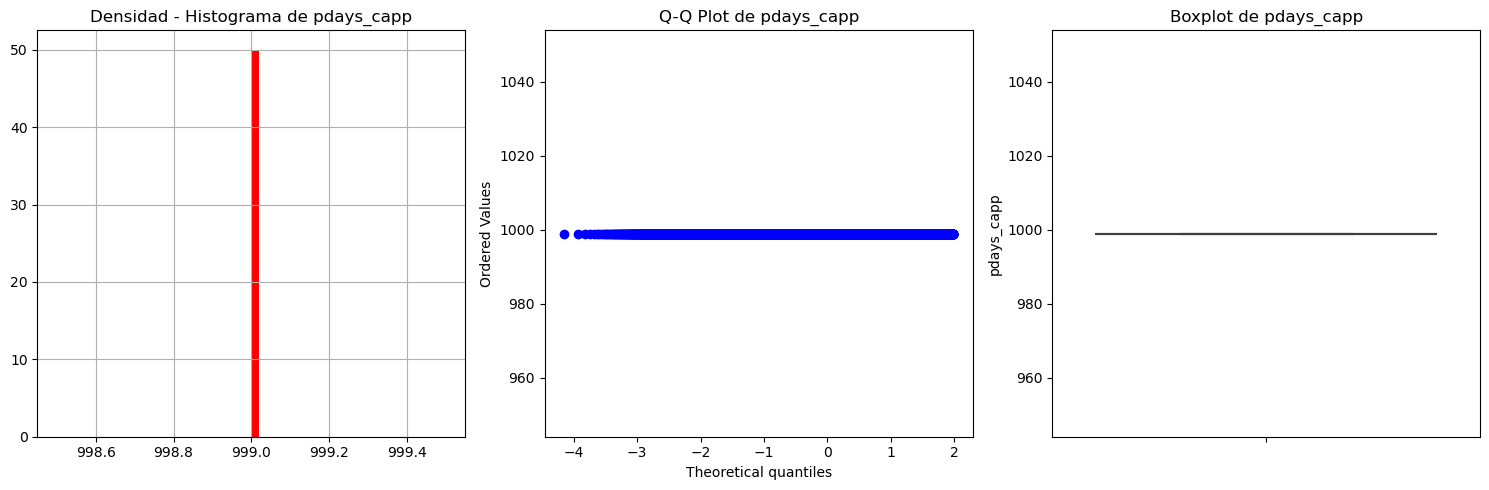

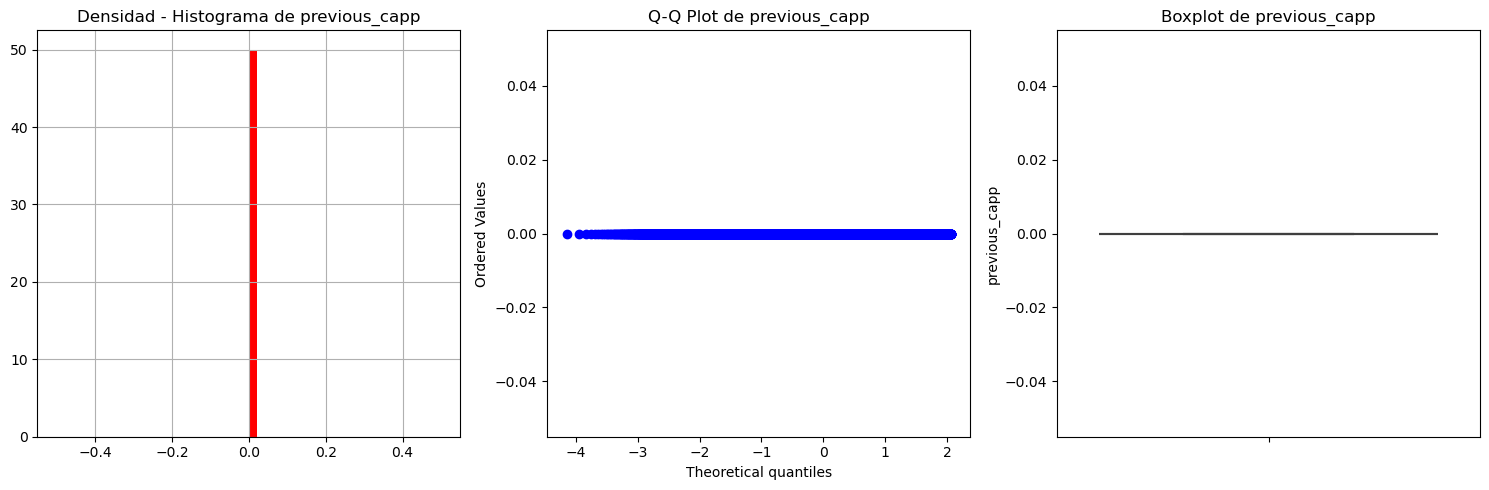

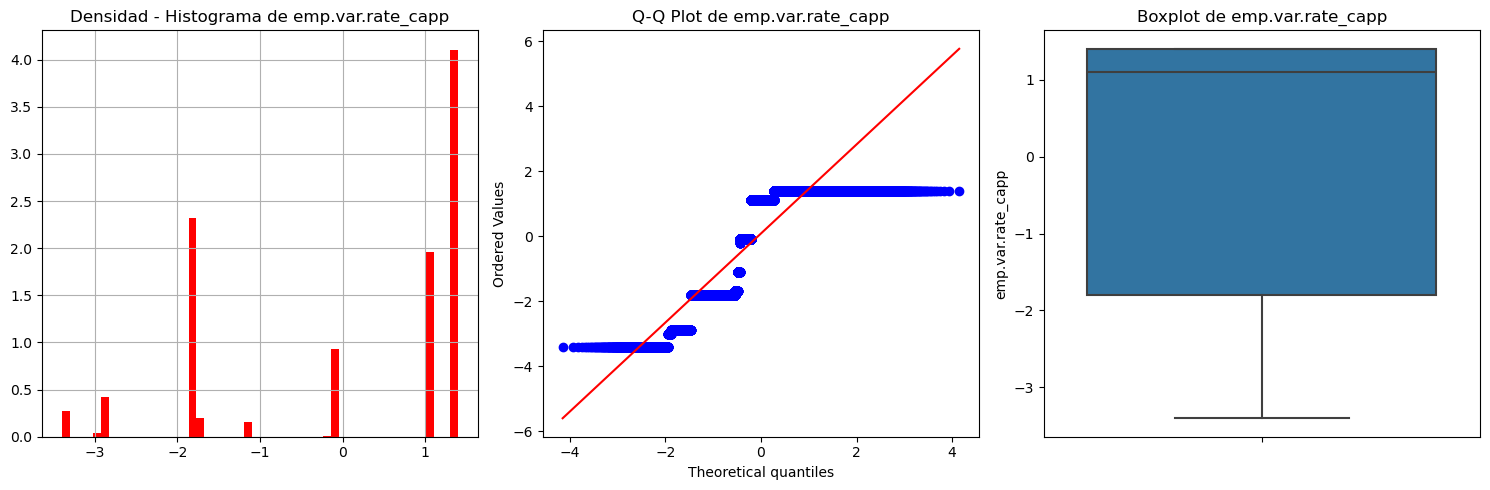

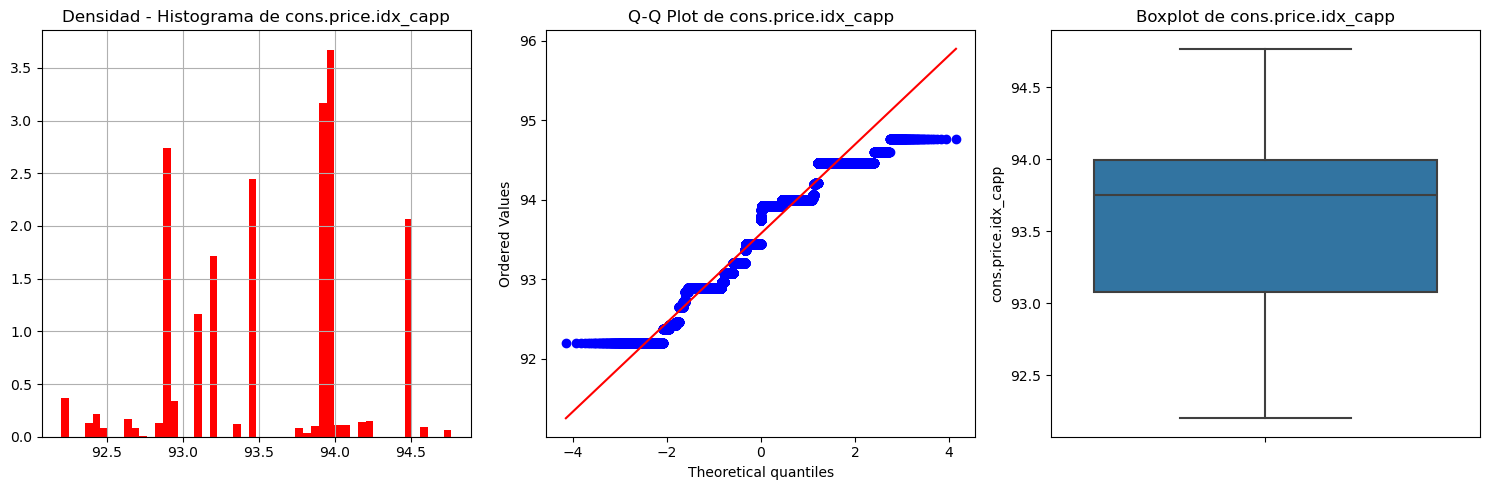

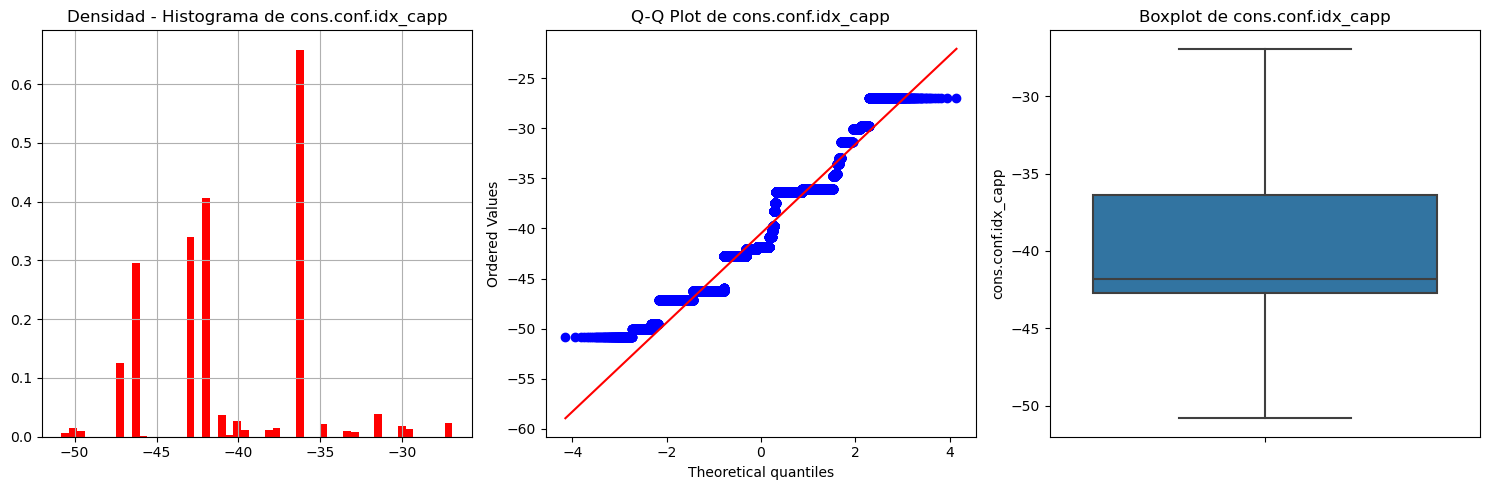

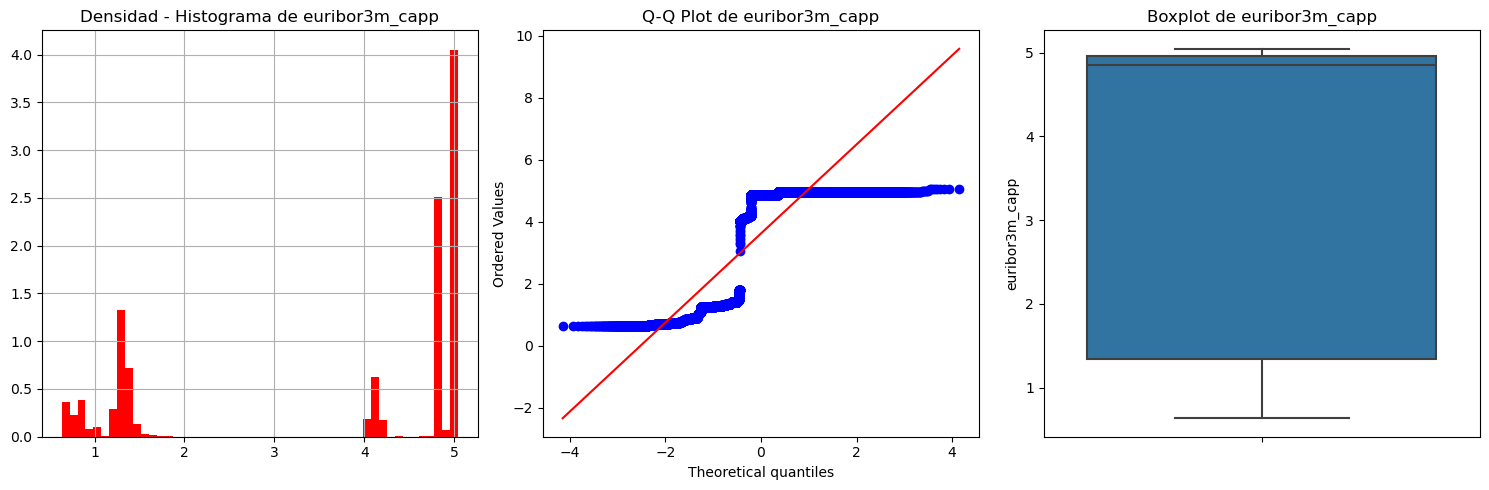

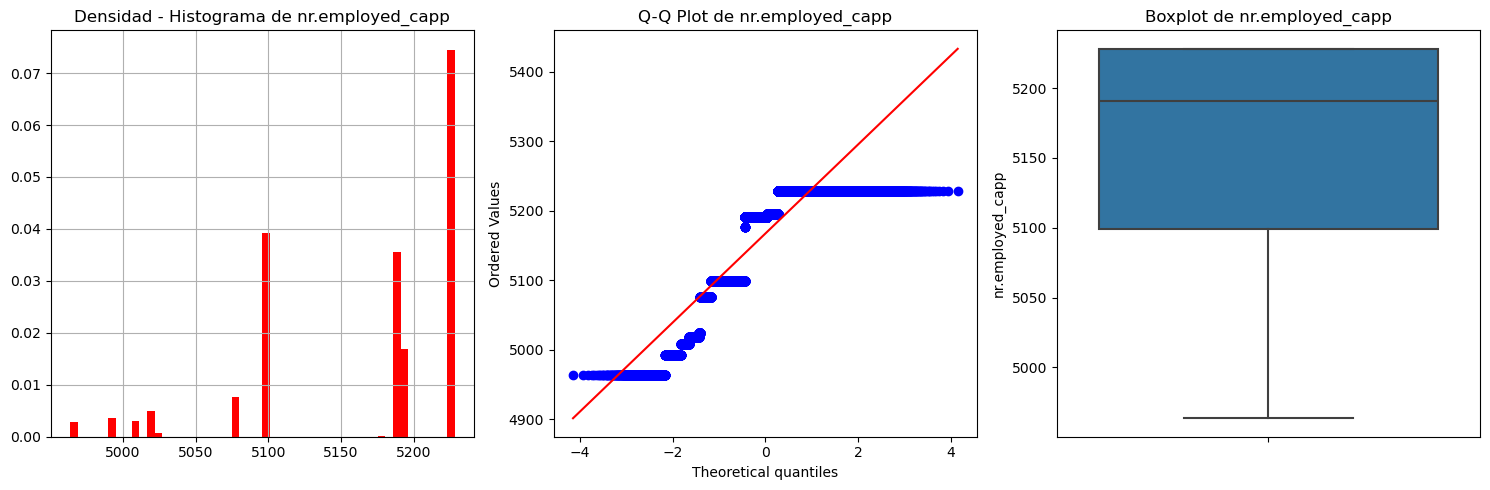

In [37]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Función para obtener los límites de outliers
def get_outliers_limits(dataset, col):
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (1.5 * IQR)
    LS = dataset[col].quantile(0.75) + (1.5 * IQR)
    return LI, LS

# Función para tratar outliers
def treat_outliers(df, col):
    LI, LS = get_outliers_limits(df, col)
    df[col + '_capp'] = np.where(df[col] > LS, LS, np.where(df[col] < LI, LI, df[col]))
    return df

# Función para graficar la distribución y el Q-Q plot
def plot_outliers_analysis(dataset, col):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    dataset[col].hist(bins=50, density=True, color='red')
    plt.title(f"Densidad - Histograma de {col}")
    
    plt.subplot(1, 3, 2)
    stats.probplot(dataset[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {col}")
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=dataset[col])
    plt.title(f"Boxplot de {col}")
    
    plt.tight_layout()
    plt.show()

# Cargar el archivo CSV
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Identificar las columnas con datos numéricos continuos
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Tratar y graficar cada columna numérica continua
for col in numerical_cols:
    data = treat_outliers(data, col)
    plot_outliers_analysis(data, col + '_capp')


### Estandarización de variables

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


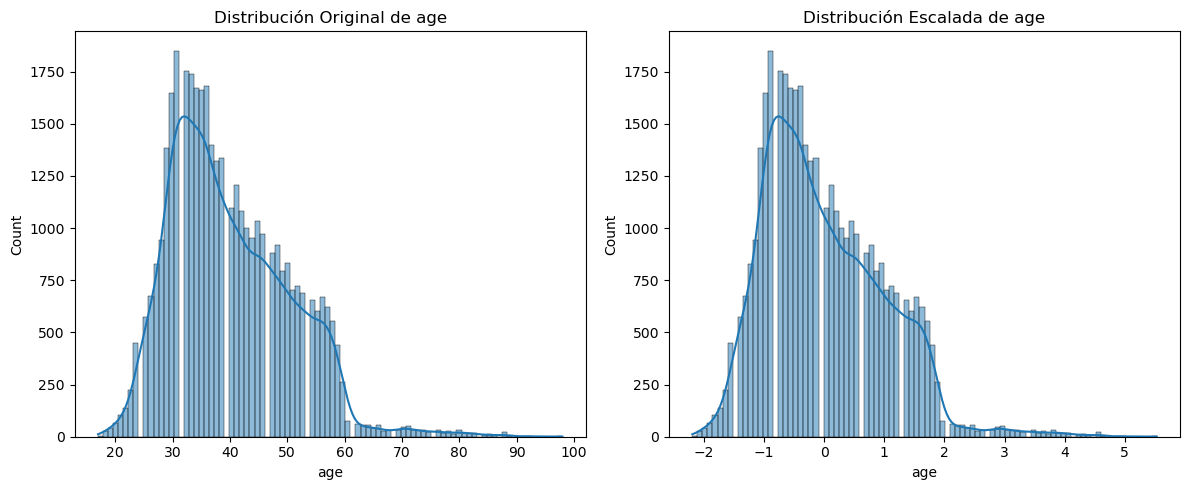

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


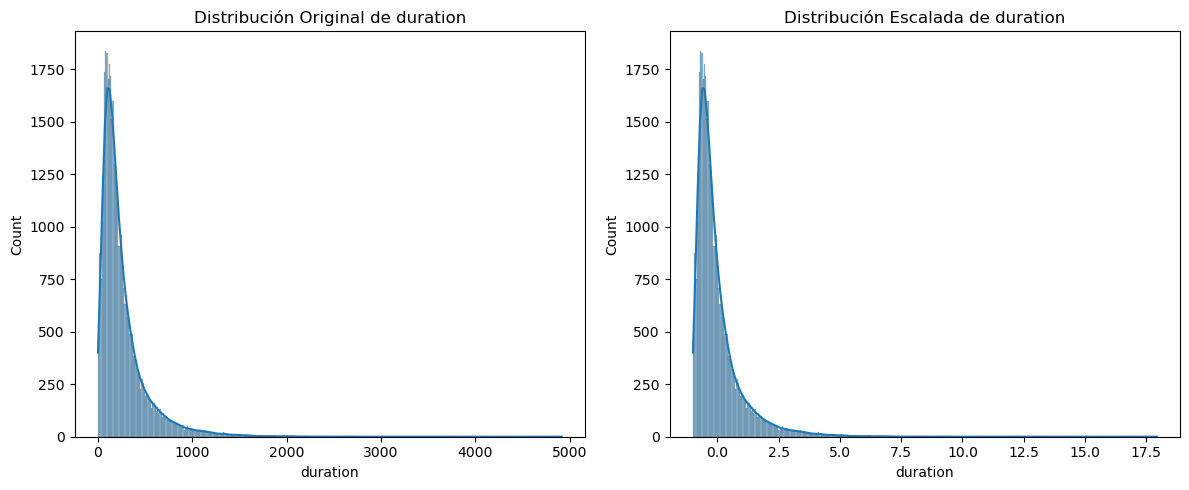

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


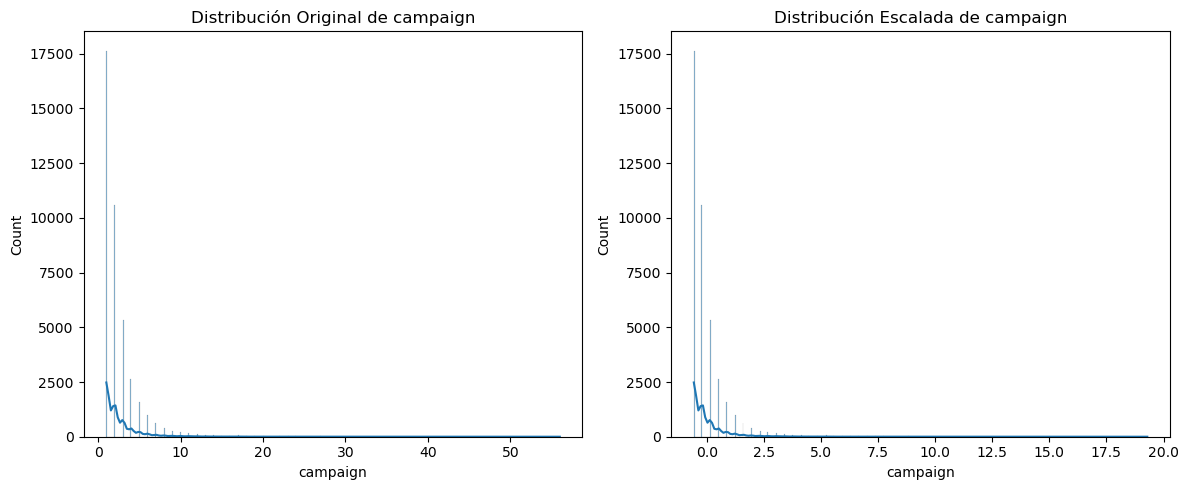

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


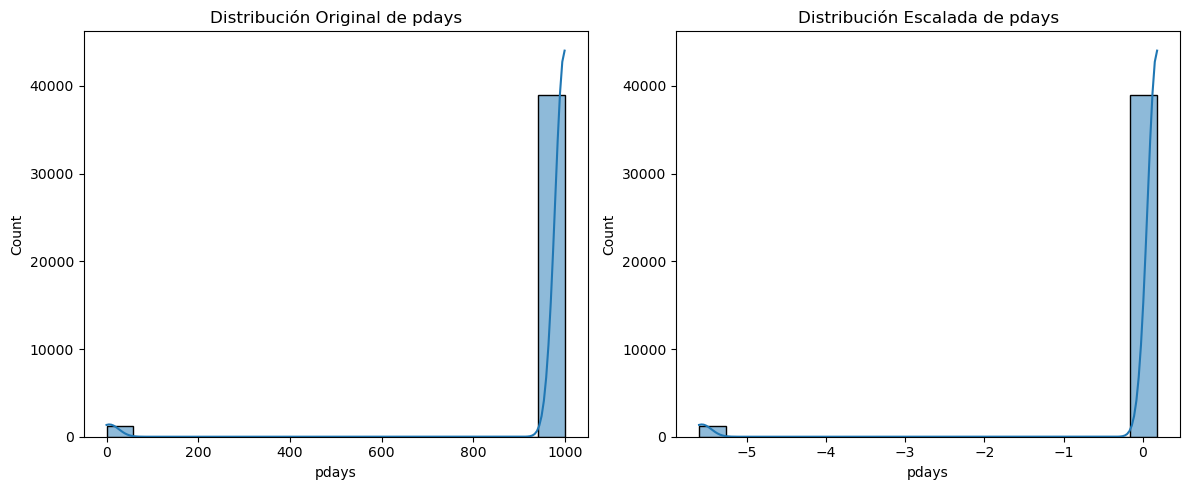

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


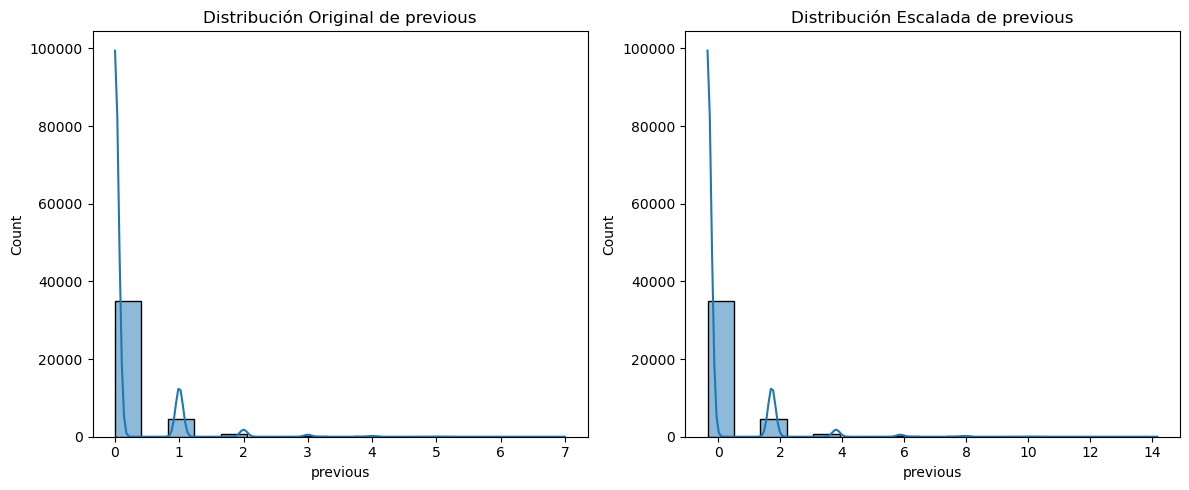

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


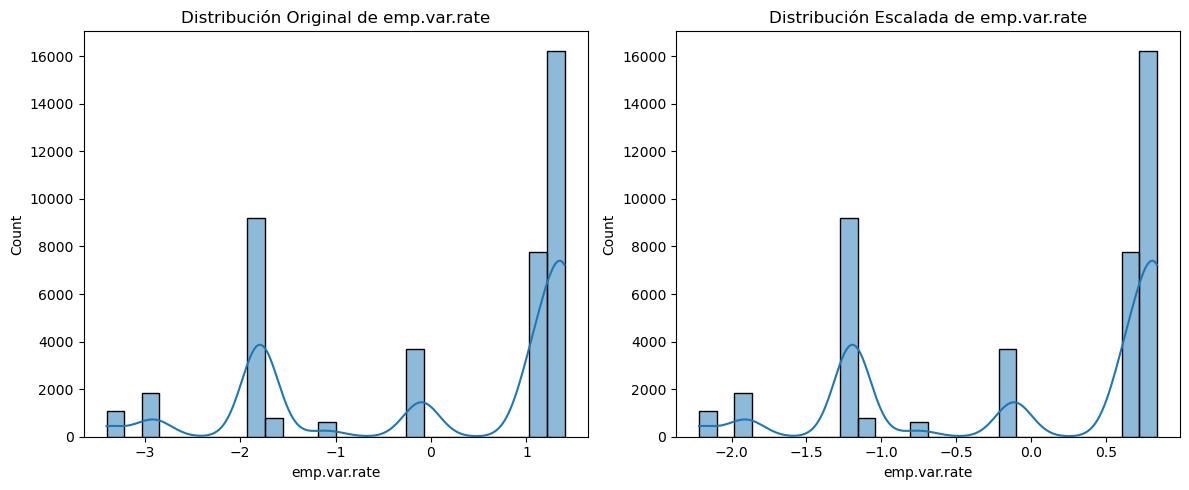

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


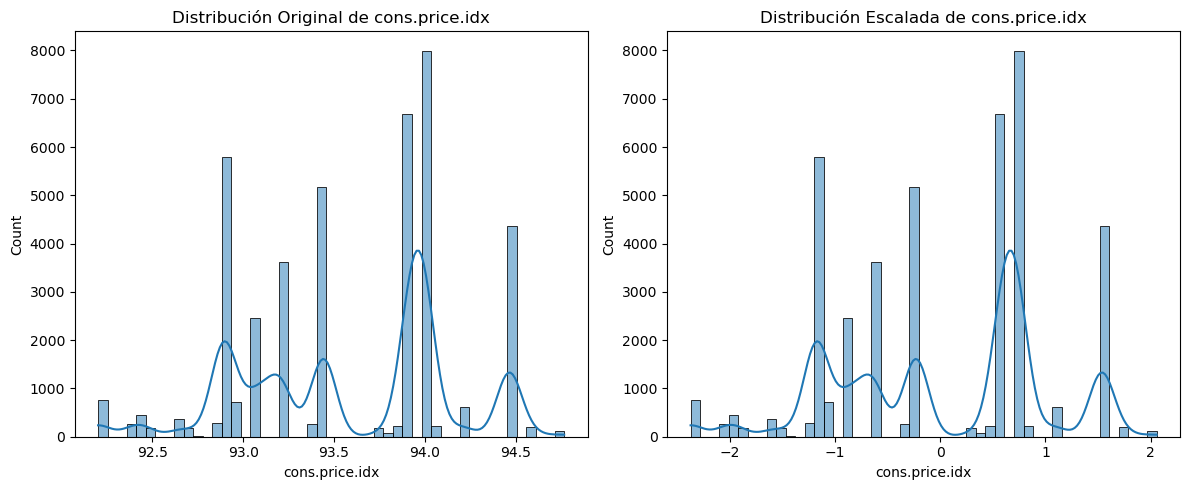

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


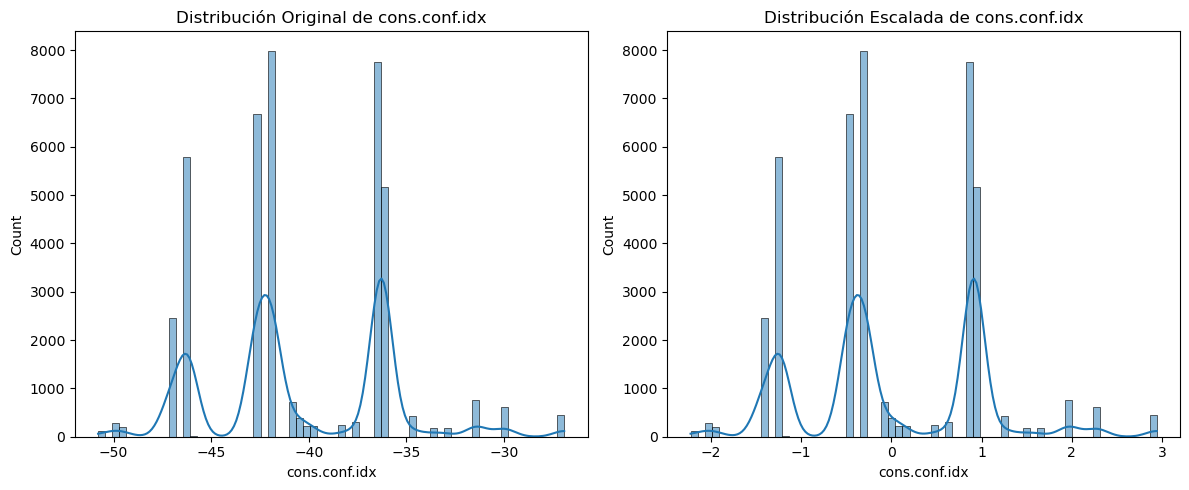

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


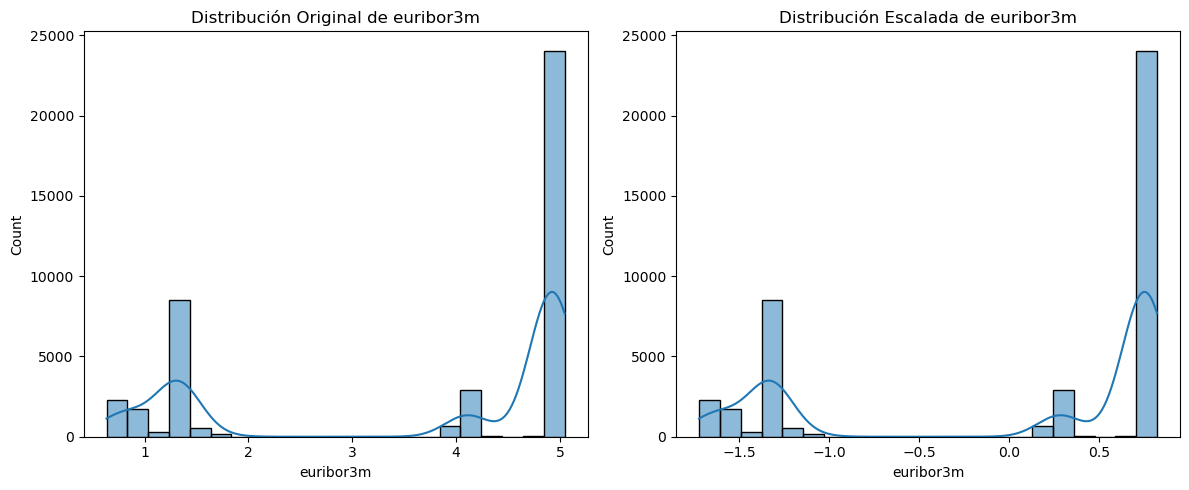

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


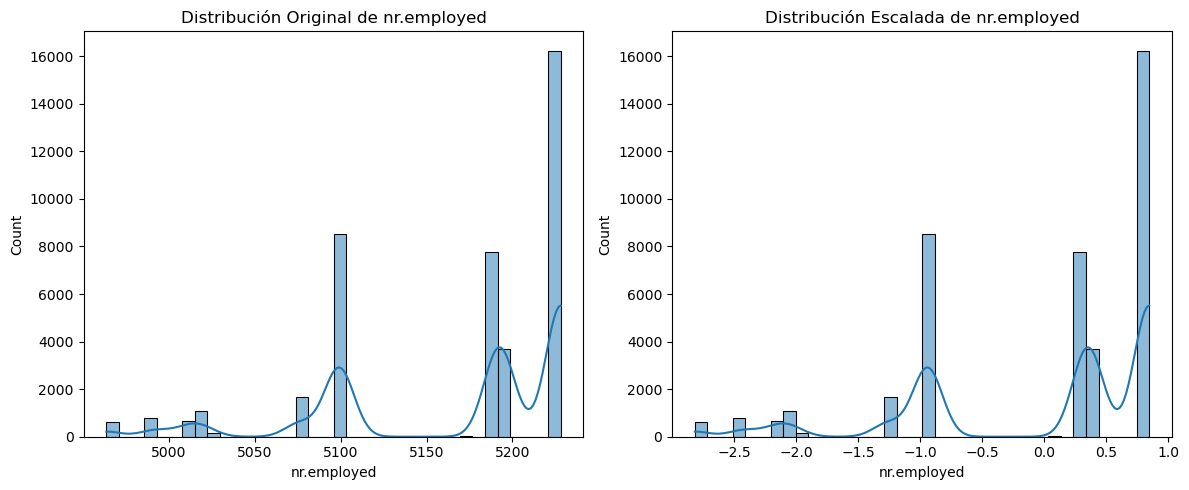

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


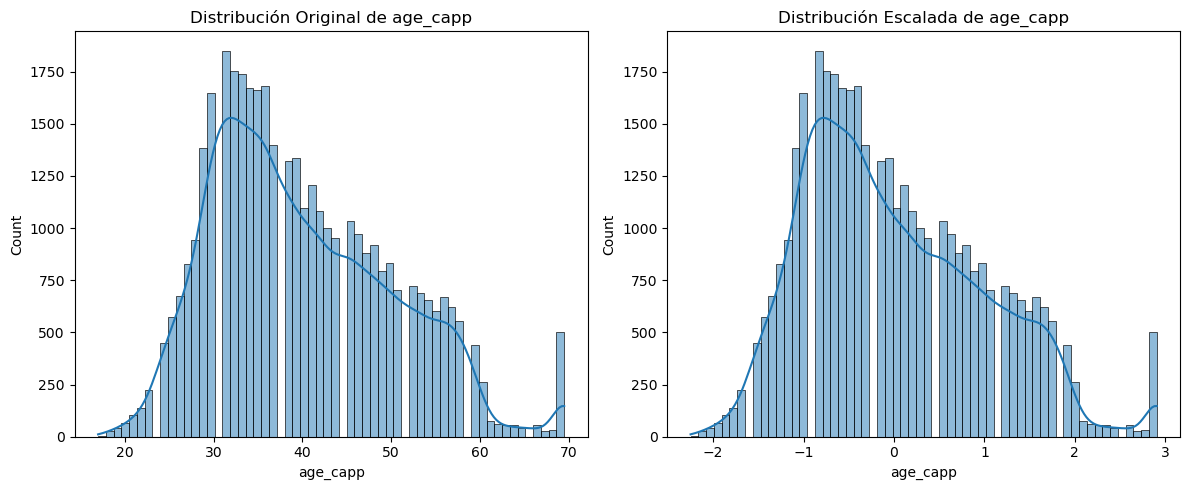

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


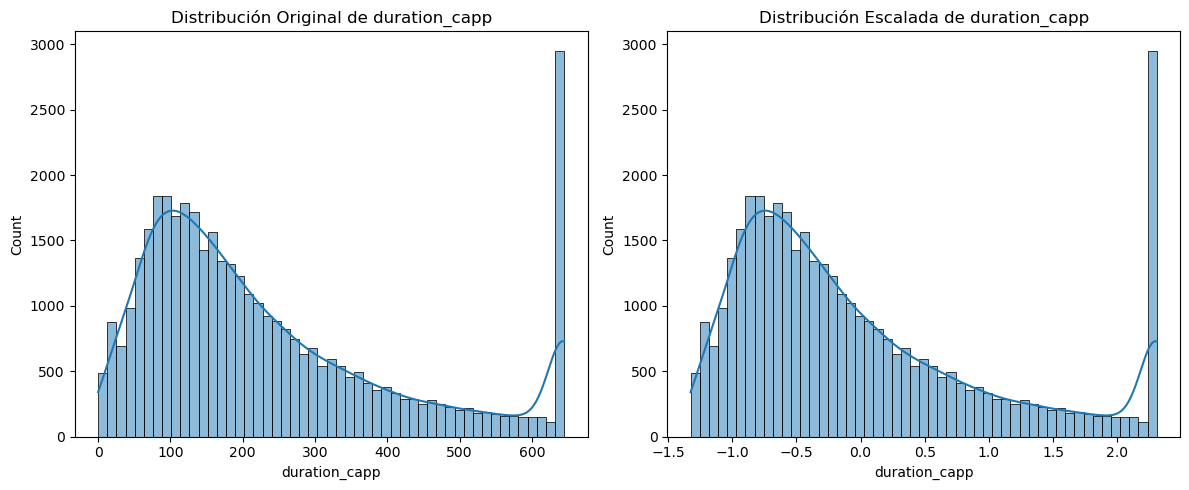

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


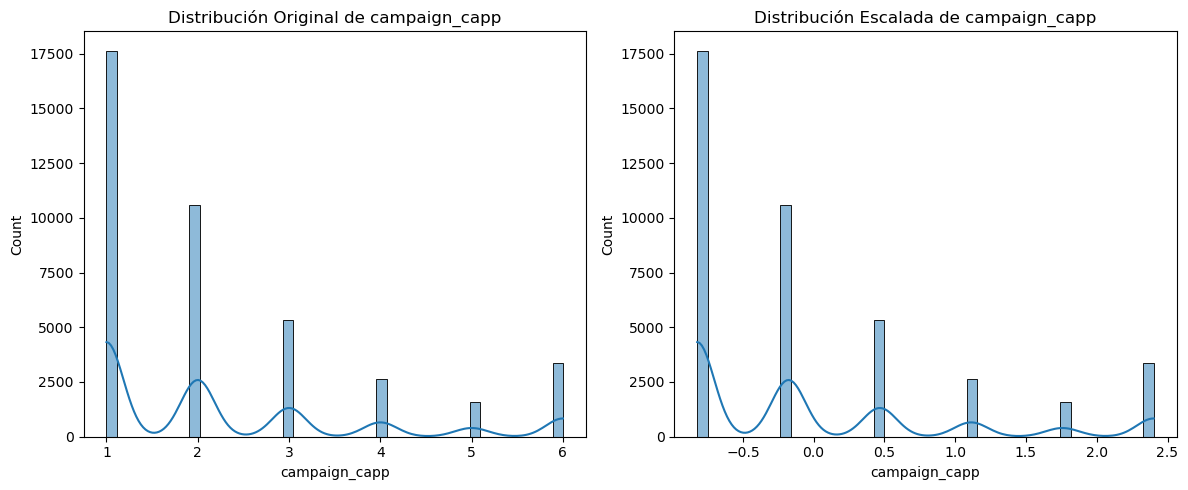

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


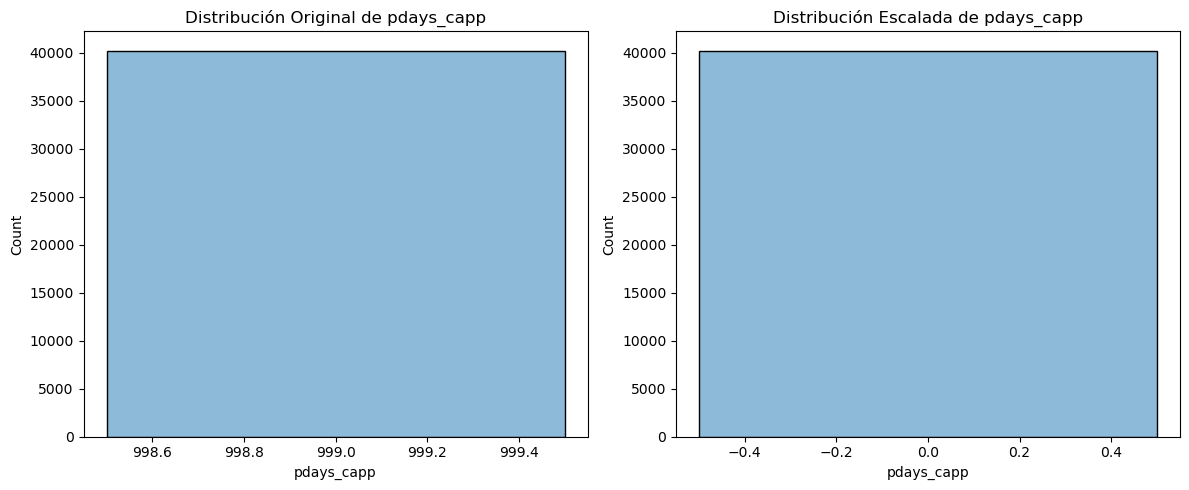

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


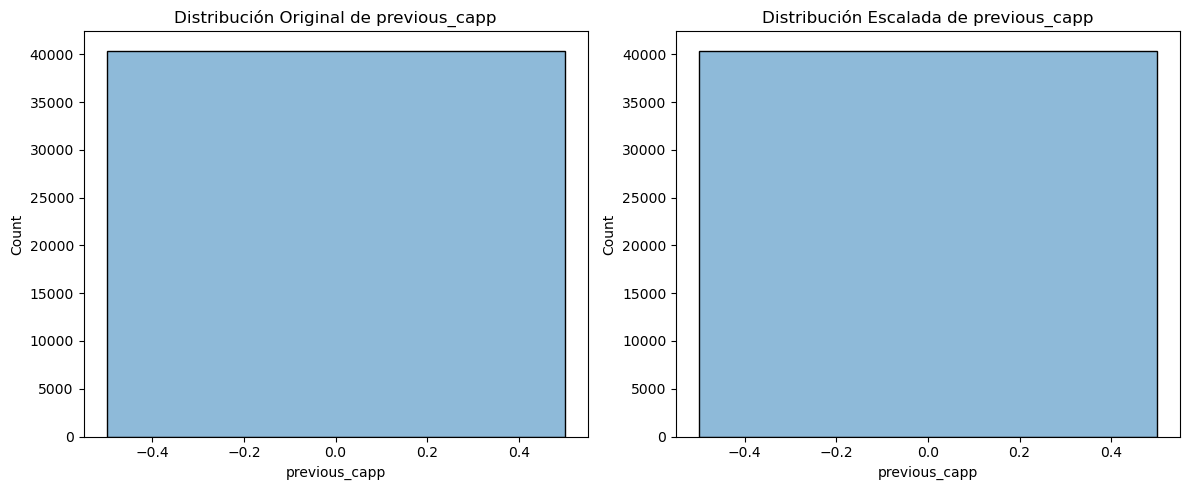

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


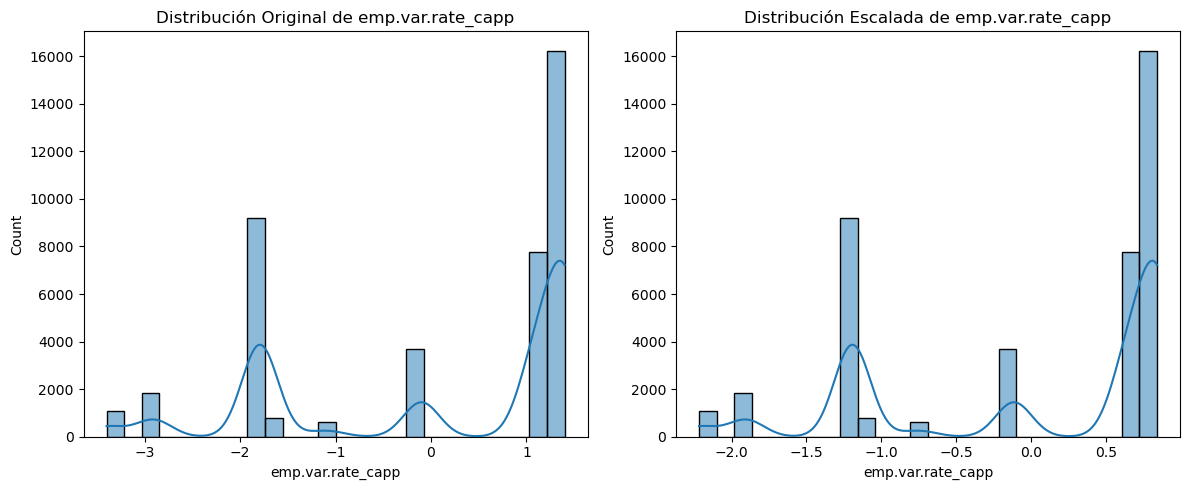

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


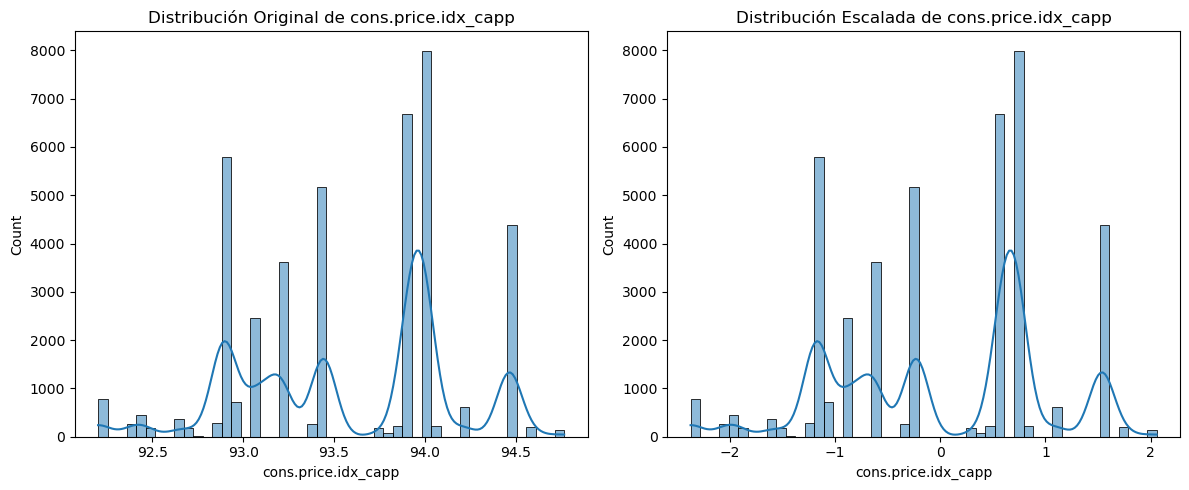

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


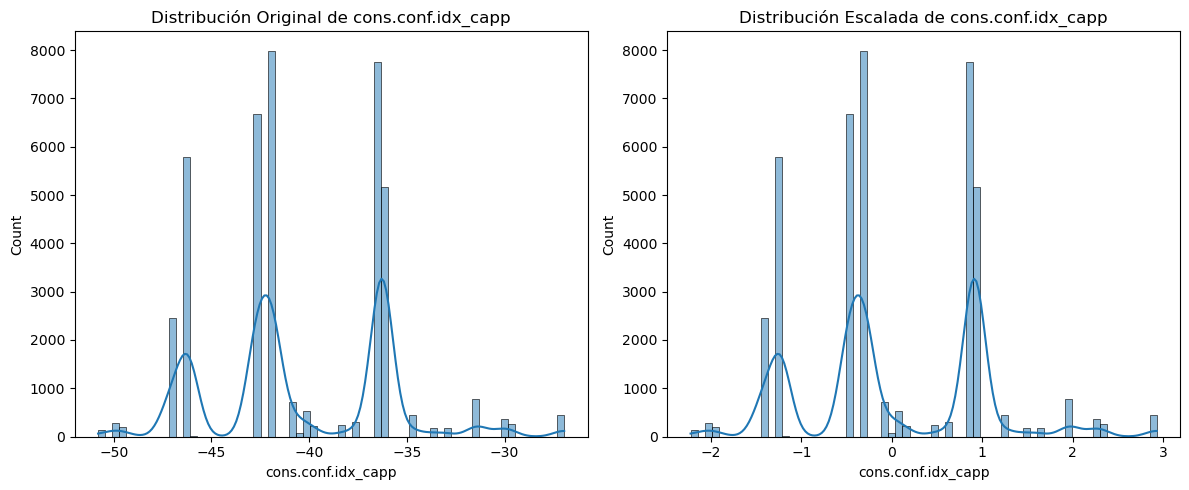

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


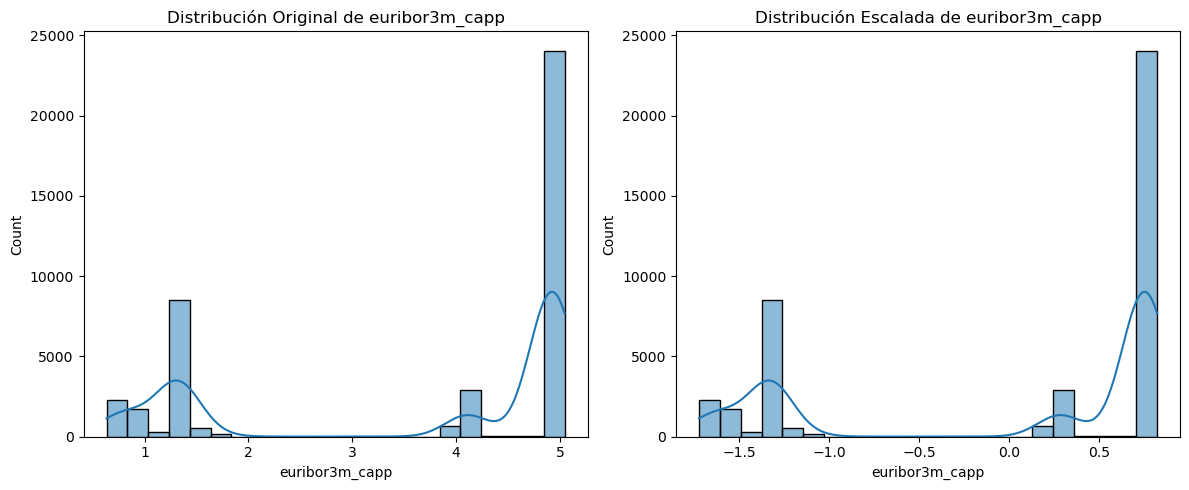

c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\erodr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


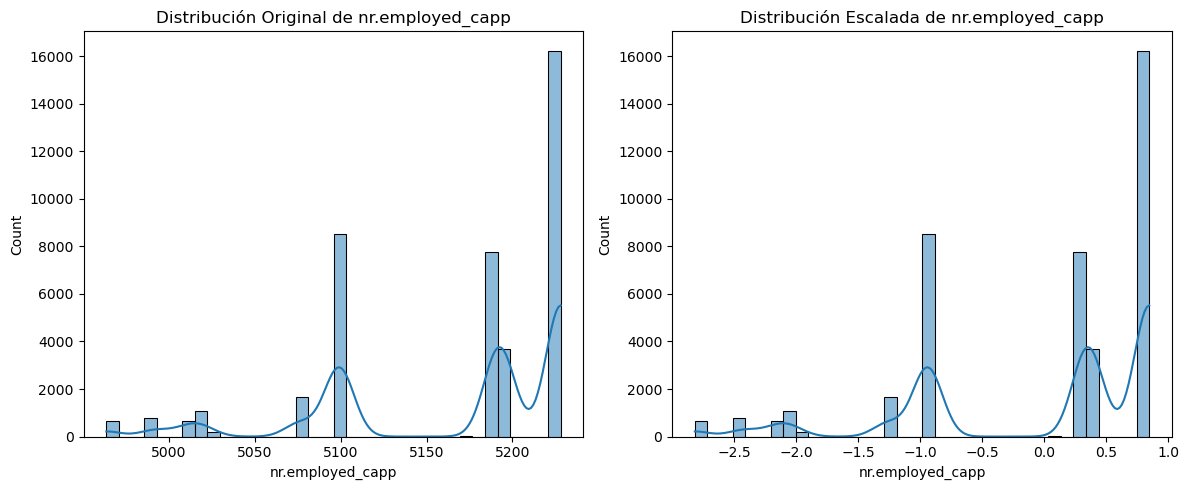

In [38]:
from sklearn.preprocessing import StandardScaler

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numerical_cols] = scaler.fit_transform(data[numerical_cols])

def plot_comparison(original_data, scaled_data, column):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.histplot(original_data[column], kde=True, ax=ax[0])
    ax[0].set_title(f'Distribución Original de {column}')
    
    sns.histplot(scaled_data[column], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribución Escalada de {column}')
    
    plt.tight_layout()
    plt.show()

# Grafica con la comparación para cada columna numérica continua
for col in numerical_cols:
    plot_comparison(data, data_scaled, col)


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats

In [42]:
# Cargar los datos
data1 = pd.read_csv("bank-additional-full.csv", sep=';')

# Mostrar las primeras filas del DataFrame para entender su estructura
print(data1.head())
print(data1.info())

    age        job  marital    education default housing loan    contact  \
0  56.0  housemaid  married     basic.4y      no      no   no  telephone   
1  57.0   services  married  high.school     NaN      no   no  telephone   
2  37.0   services  married  high.school      no     yes   no  telephone   
3  40.0     admin.  married     basic.6y      no      no   no  telephone   
4  56.0   services  married  high.school      no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1  999.0       0.0  nonexistent          1.1   
1   may         mon  ...         1  999.0       0.0  nonexistent          1.1   
2   may         mon  ...         1  999.0       0.0  nonexistent          1.1   
3   may         mon  ...         1  999.0       0.0  nonexistent          1.1   
4   may         mon  ...         1  999.0       0.0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [43]:
# Identificar las variables numéricas y categóricas
numeric_features = data1.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data1.select_dtypes(include=['object']).columns

# Definir el pipeline para las características numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Definir el pipeline para las características categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar la transformación
data_transformed = preprocessor.fit_transform(data1)

# Convertir el resultado a DataFrame para revisar
column_names = numeric_features.tolist() + list(preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features))
data_transformed_df = pd.DataFrame(data_transformed, columns=column_names)

# Guardar el DataFrame transformado a un archivo CSV en la ruta especificada
output_file_path = r'C:\Users\erodr\OneDrive\Escritorio\6to trimestre\Statistical Learning I\Proyecto Fase1\bank-additional-full-transformed.csv'
data_transformed_df.to_csv(output_file_path, index=False)

print("Transformación completa y datos guardados en:", output_file_path)

Transformación completa y datos guardados en: C:\Users\erodr\OneDrive\Escritorio\6to trimestre\Statistical Learning I\Proyecto Fase1\bank-additional-full-transformed.csv
